<a href="https://colab.research.google.com/github/oimartin/Older-and-Wiser/blob/working_b/gender_data_US_Census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Comparing different population groups population over 10 years: 2009 - 2019
<br>
<br>
Source: U.S. Census Bureau, Current Population Survey, Annual Social and Economic Supplement, 2009
<br>
<br>
NOTE: The 2014 CPS ASEC included redesigned questions for income and health insurance coverage

# Digest Data

In [1]:
# import dependencies
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.io as pio
import seaborn as sns

In [2]:
# import data from github
# data originally as xlsx Excel file, but converted to csv to be hosted in github
yr2009 = pd.read_csv('https://raw.githubusercontent.com/oimartin/Older-and-Wiser/main/data/2009gender_table1.csv')
yr2010 = pd.read_csv('https://raw.githubusercontent.com/oimartin/Older-and-Wiser/main/data/2010gender_table1.csv')
yr2011 = pd.read_csv('https://raw.githubusercontent.com/oimartin/Older-and-Wiser/main/data/2011gender_table1.csv')
yr2012 = pd.read_csv('https://raw.githubusercontent.com/oimartin/Older-and-Wiser/main/data/2012gender_table1.csv')
yr2013 = pd.read_csv('https://raw.githubusercontent.com/oimartin/Older-and-Wiser/main/data/2013gender_table1.csv')
yr2014 = pd.read_csv('https://raw.githubusercontent.com/oimartin/Older-and-Wiser/main/data/2014gender_table1.csv')
yr2015 = pd.read_csv('https://raw.githubusercontent.com/oimartin/Older-and-Wiser/main/data/2015gender_table1.csv')
yr2016 = pd.read_csv('https://raw.githubusercontent.com/oimartin/Older-and-Wiser/main/data/2016gender_table1.csv')
yr2017 = pd.read_csv('https://raw.githubusercontent.com/oimartin/Older-and-Wiser/main/data/2017gender_table1.csv')
yr2018 = pd.read_csv('https://raw.githubusercontent.com/oimartin/Older-and-Wiser/main/data/2018gender_table1.csv')
yr2019 = pd.read_csv('https://raw.githubusercontent.com/oimartin/Older-and-Wiser/main/data/2019gender_table1.csv')

In [3]:
original_yr2009 = yr2009
original_yr2014 = yr2014

In [6]:
years = [yr2009, yr2010, yr2011, yr2012, yr2013, yr2014,
         yr2015, yr2016, yr2017, yr2018, yr2019]

yrs = ['2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019']
for year in years:
  display(year.shape)

(40, 8)

(40, 8)

(39, 8)

(39, 8)

(41, 8)

(49, 8)

(39, 8)

(41, 8)

(41, 8)

(41, 8)

(42, 8)

In [7]:
for year in range(0,11):
  years[year].drop(columns=['Unnamed: 7'], inplace=True)
  years[year][yrs[year]] = yrs[year]
  years[year].rename(columns={years[year].columns[0]:'Age',
                              years[year].columns[1]:'Both_Sexes_No',
                              years[year].columns[2]:'Both_Sexes_Perc.',
                              years[year].columns[3]:'Male_No',
                              years[year].columns[4]:'Male_Perc.',
                              years[year].columns[5]:'Fem_No',
                              years[year].columns[6]:'Fem_Perc.',
                              years[year].columns[7]:'Year'}, inplace=True)
  years[year].dropna(axis=0, inplace=True)

In [8]:
for year in years:
  display(year.shape)

(26, 8)

(26, 8)

(26, 8)

(26, 8)

(26, 8)

(26, 8)

(26, 8)

(26, 8)

(26, 8)

(26, 8)

(26, 8)

## Sepearte out Median Age from other Ages

In [9]:
all_09_19 = pd.concat(years)
all_09_19['Age'] = all_09_19['Age'].str.lstrip()
all_09_19['Age'] = all_09_19['Age'].str.lstrip('.')
all_09_19 = all_09_19.replace(',', '', regex=True)

In [42]:
all_09_19.loc[(all_09_19['Age'] >= '45 to 64 years') | (all_09_19['Age'] <= '21 to 44 years')]

,Age,Both_Sexes_No,Both_Sexes_Perc.,Male_No,Male_Perc.,Fem_No,Fem_Perc.,Year
6,Under 5 years,21187.0,7.0,10842.0,7.3,10345.0,6.7,2009
7,5 to 9 years,20245.0,6.7,10351.0,7.0,9894.0,6.5,2009
8,10 to 14 years,19907.0,6.6,10181.0,6.9,9726.0,6.3,2009
9,15 to 19 years,21227.0,7.0,10782.0,7.3,10445.0,6.8,2009
10,20 to 24 years,20632.0,6.8,10420.0,7.0,10212.0,6.7,2009
...,...,...,...,...,...,...,...,...
26,15 to 17 years,13018.0,4.0,6656.0,4.2,6363.0,3.8,2019
27,18 to 20 years,11851.0,3.7,5931.0,3.7,5920.0,3.6,2019
28,21 to 44 years,103469.0,31.9,51658.0,32.5,51811.0,31.3,2019
29,45 to 64 years,82455.0,25.4,39789.0,25.0,42666.0,25.8,2019


In [24]:
all_09_19['Age'].value_counts()

Under 5 years        11
5 to 9 years         11
45 to 64 years       11
21 to 44 years       11
18 to 20 years       11
15 to 17 years       11
Under 15 years       11
85 years and over    11
80 to 84 years       11
75 to 79 years       11
70 to 74 years       11
65 to 69 years       11
60 to 64 years       11
55 to 59 years       11
50 to 54 years       11
45 to 49 years       11
40 to 44 years       11
35 to 39 years       11
30 to 34 years       11
25 to 29 years       11
20 to 24 years       11
15 to 19 years       11
10 to 14 years       11
65 years and over    11
Name: Age, dtype: int64

In [10]:
all_ages = all_09_19[all_09_19['Age'] == 'All ages']
all_ages

,Age,Both_Sexes_No,Both_Sexes_Perc.,Male_No,Male_Perc.,Fem_No,Fem_Perc.,Year
5,All ages,301483,100.0,148094,100.0,153388,100.0,2009
5,All ages,304280,100.0,149485,100.0,154795,100.0,2010
5,All ages,306110,100.0,150643,100.0,155466,100.0,2011
5,All ages,308827,100.0,151175,100.0,157653,100.0,2012
5,All ages,311116,100.0,152335,100.0,158781,100.0,2013
5,All ages,313401,100.0,153595,100.0,159806,100.0,2014
5,All ages,316168,100.0,154815,100.0,161353,100.0,2015
5,All ages,318868,100.0,156205,100.0,162664,100.0,2016
5,All ages,320372,100.0,156939,100.0,163433,100.0,2017
5,All ages,323156,100.0,158426,100.0,164730,100.0,2018


In [11]:
median_age = all_09_19[all_09_19['Age'] == 'Median age']
median_age

,Age,Both_Sexes_No,Both_Sexes_Perc.,Male_No,Male_Perc.,Fem_No,Fem_Perc.,Year
32,Median age,36.7,(X),35.5,(X),37.9,(X),2009
32,Median age,36.7,(X),35.5,(X),37.9,(X),2010
32,Median age,36.8,(X),35.5,(X),38.1,(X),2011
32,Median age,37.3,(X),36.1,(X),38.5,(X),2012
32,Median age,37.3,(X),36.1,(X),38.5,(X),2013
32,Median age,37.6,(X),36.4,(X),38.8,(X),2014
32,Median age,37.8,(X),36.6,(X),39.0,(X),2015
32,Median age,37.9,(X),36.7,(X),39.1,(X),2016
32,Median age,38.0,(X),36.8,(X),39.2,(X),2017
32,Median age,38.1,(X),37.0,(X),39.3,(X),2018


In [17]:
all_09_19 = all_09_19[all_09_19['Age'] != 'Median age']
all_09_19 = all_09_19[all_09_19['Age'] != 'All ages']

for column in list(all_09_19.columns)[1:-1]:
    all_09_19[column] = all_09_19[column].astype(float)

# Compare different age groups change in population from 2009-2019

## Seperate out different age groups

In [18]:
all_65_over = all_09_19[all_09_19['Age'] == '65 years and over']
all_65_over

,Age,Both_Sexes_No,Both_Sexes_Perc.,Male_No,Male_Perc.,Fem_No,Fem_Perc.,Year
30,65 years and over,37788.0,12.5,16308.0,11.0,21480.0,14.0,2009
30,65 years and over,38613.0,12.7,16793.0,11.2,21820.0,14.1,2010
30,65 years and over,39179.0,12.8,17081.0,11.3,22098.0,14.2,2011
30,65 years and over,41507.0,13.4,18332.0,12.1,23174.0,14.7,2012
30,65 years and over,43287.0,13.9,19298.0,12.7,23990.0,15.1,2013
30,65 years and over,44477.0,14.2,19731.0,12.8,24745.0,15.5,2014
30,65 years and over,45994.0,14.5,20439.0,13.2,25555.0,15.8,2015
30,65 years and over,47547.0,14.9,21209.0,13.6,26337.0,16.2,2016
30,65 years and over,49274.0,15.4,22160.0,14.1,27114.0,16.6,2017
30,65 years and over,51080.0,15.8,23059.0,14.6,28021.0,17.0,2018


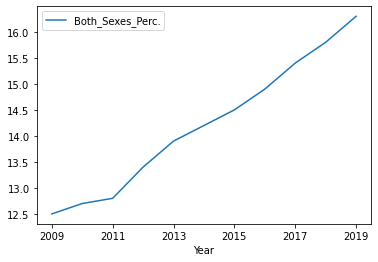

In [19]:
all_65_over.plot(kind='line', x='Year', y='Both_Sexes_Perc.')

In [21]:
fig = px.line(all_09_19, x='Year', y='Both_Sexes_No', color='Age', markers=True)
fig.show()